In [2]:
#preamble 
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import IBMQ
import qiskit
import random
import pandas as pd
import numpy as np 
from qiskit.providers.ibmq import IBMQJob
from qiskit.providers.ibmq.job import job_monitor


n = 2
q = QuantumRegister(n, 'q')
c = ClassicalRegister(n, 'c')
qc = []
qc.append(QuantumCircuit(q, c))



count = 0
for i in range(10):
    for j in range(5):
        qc[count].id(0)
        qc[count].id(1)
        qc.append(QuantumCircuit(q,c))
    count = count + 1

# Do it for both qubits
       





In [3]:
#defining circuits
qc = []
    



for i in range(5,25):  # no. of circuits
    n = 2
    q = QuantumRegister(n, 'q')
    c = ClassicalRegister(n, 'c')
    qc.append(QuantumCircuit(q,c))
    for j in range(6):
        qc[i-5].id(0)
        qc[i-5].id(1)
 
for i in range(20):
    qc[i].measure(q,c)

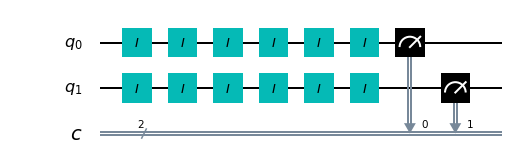

In [4]:
#checking the output
qc[19].draw(output = "mpl")


In [5]:
#saving account
IBMQ.save_account('e16aff0cd0c88a64f3123ca8f2417390e7c73433dbc8b7d872ff853bd6045d642d2230ed0b26ee080c6947f2c924fa031339b76ecd79c0b96eb9b6c08184230d')

configrc.store_credentials:WARNING:2020-10-20 09:53:38,994: Credentials already present. Set overwrite=True to overwrite.


In [6]:
#loading account
IBMQ.load_account()
IBMQ.providers()


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [7]:
#checking backends
provider = IBMQ.get_provider()
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [8]:
#submitting the circuit to IBM Q
backend = provider.get_backend('ibmq_ourense')

job_exp = qiskit.execute(qc,backend=backend,shots = 8132)




In [9]:
#checking the job
job_monitor(job_exp)


Job Status: job has successfully run                        


In [48]:
#checking the result
output = job_exp.result().get_counts()
output

#00:1, 10:2, 11:3, 01:4


[{'01': 73, '11': 4, '00': 7793, '10': 262},
 {'01': 81, '11': 2, '00': 7793, '10': 256},
 {'01': 82, '11': 1, '00': 7794, '10': 255},
 {'01': 86, '11': 5, '00': 7785, '10': 256},
 {'01': 73, '11': 4, '00': 7815, '10': 240},
 {'01': 71, '00': 7817, '10': 244},
 {'01': 55, '11': 6, '00': 7809, '10': 262},
 {'01': 70, '11': 5, '00': 7832, '10': 225},
 {'01': 85, '11': 5, '00': 7821, '10': 221},
 {'01': 94, '11': 5, '00': 7768, '10': 265},
 {'01': 72, '11': 5, '00': 7801, '10': 254},
 {'01': 77, '11': 2, '00': 7822, '10': 231},
 {'01': 97, '11': 2, '00': 7781, '10': 252},
 {'01': 81, '11': 4, '00': 7774, '10': 273},
 {'01': 98, '11': 5, '00': 7784, '10': 245},
 {'01': 84, '11': 2, '00': 7804, '10': 242},
 {'01': 68, '11': 1, '00': 7808, '10': 255},
 {'01': 82, '11': 3, '00': 7799, '10': 248},
 {'01': 98, '11': 1, '00': 7821, '10': 212},
 {'01': 79, '11': 1, '00': 7834, '10': 218}]

In [49]:
#creating dataframe
import pandas as pd
df = pd.DataFrame(output)
print (df)


    01   11    00   10
0   73  4.0  7793  262
1   81  2.0  7793  256
2   82  1.0  7794  255
3   86  5.0  7785  256
4   73  4.0  7815  240
5   71  NaN  7817  244
6   55  6.0  7809  262
7   70  5.0  7832  225
8   85  5.0  7821  221
9   94  5.0  7768  265
10  72  5.0  7801  254
11  77  2.0  7822  231
12  97  2.0  7781  252
13  81  4.0  7774  273
14  98  5.0  7784  245
15  84  2.0  7804  242
16  68  1.0  7808  255
17  82  3.0  7799  248
18  98  1.0  7821  212
19  79  1.0  7834  218


In [50]:
#location
path = '/Users/student/Documents/summer_research/circuit_results/project2/'

In [51]:
#saving to csv file
df.to_csv(path + '6_idgates.csv')

In [52]:
#finding the probabilty for p00,p01,p10,p11
for i in range(len(output)):
    if '00' in output[i]:
        output[i]['00'] = output[i]['00']/8132
    if '01' in output[i]:
        output[i]['01'] = output[i]['01']/8132
    if '10' in output[i]:
        output[i]['10'] = output[i]['10']/8132
    if '11' in output[i]:
        output[i]['11'] = output[i]['11']/8132
        
 

#Reason behind relative entropy (defining p_0,p_0',p_1,p_1'  to get q00,q01,...)
p_00 = p_0 * p_0’

Independent events: 


In |0>

p_0 = p_00 + p_10
p_1 = p_01 + p_11


In |1>

p_0’ = p_00 + p_01
p_1’ = p_10 + p_11




If we have independent events:

p_0 * p_0’ = q00
p_0 * p_1’ = q10
p_1 * p_0’ = q01
p_1 * p_1’ = q11


If equal then no correlation. If deviation between two of them then it gives us the correlation.




Syntax:
p_x’ = prob of measuring of getting x in the second qubit(|1>)
p_x =  prob of measuring of getting x in the first qubit(|0>)




In [53]:
#creating list for p_0,p_0_, p_1, p_1_
p_0 = []
p_0_ = []
p_1 = []
p_1_ = []

for i in range(len(output)):
    if '00' in output[i] and '01' in output[i]:
        p_0_.append(output[i]['00'] + output[i]['01'])
    elif '00' in output[i]:
        p_0_.append(output[i]['00'])
    elif '01' in output[i]:
        p_0_.append(output[i]['00'])
    else:
        p_0_.append(0)
    if '10' in output[i] and '11' in output[i]:
        p_1_.append(output[i]['10'] + output[i]['11'])
    elif '10' in output[i]:
        p_1_.append(output[i]['10'])
    elif '11' in output[i]:
        p_1_.append(output[i]['11'])
    else:
        p_1_.append(0)
    if '00' in output[i] and '10' in output[i]:
        p_0.append(output[i]['00'] + output[i]['10'])
    elif '00' in output[i]:
        p_0.append(output[i]['00'])
    elif '10' in output[i]:
        p_0.append(output[i]['10'])
    else:
        p_0.append(0)
    if '01' in output[i] and '11' in output[i]:
        p_1.append(output[i]['01'] + output[i]['11'])
    elif '01' in output[i]:
        p_1.append(output[i]['01'])
    elif '11' in output[i]:
        p_1.append(output[i]['11'])
    else:
        p_1.append(0)
        


In [54]:
 p_1_[9] + p_0_[9]

1.0

In [55]:
#double checking the length of p_0, p_1...
len(p_0),len(p_0_),len(p_1),len(p_1_)

(20, 20, 20, 20)

In [56]:
#defining the q_s based on the independence of the events. 
'''
q00 = p_0 * p_0’  
q10 = p_0 * p_1’ 
q01 = p_1 * p_0’ 
q11 = p_1 * p_1’ 

'''


q00 = []
q01 = []
q10 = []
q11 = []


for i in range(len(p_0)):
    q00.append(p_0[i] * p_0_[i])
    q01.append(p_1[i] * p_0_[i])
    q10.append(p_0[i] * p_1_[i])
    q11.append(p_1[i] * p_1_[i])


In [57]:
#double check the length of q_s
len(q00),len(q01),len(q10),len(q11)

(20, 20, 20, 20)

In [58]:
#making the list of p00, p01,p10,p11 (the outputs from IBM Q)
p00 = []
p01 = []
p10 = []
p11 = []

for i in range(len(output)):
    if '00' in output[i]:
        p00.append(output[i]['00'])
    else: 
        p00.append(0)
    if '01' in output[i]:
        p01.append(output[i]['01'])
    else: 
        p01.append(0)
    if '10' in output[i]:
        p10.append(output[i]['10'])
    else: 
        p10.append(0)
    if '11' in output[i]:
        p11.append(output[i]['11'])
    else: 
        p11.append(0)
    
  

In [59]:
#create p (list of p00,p01,p10,p11 for each output)
p = []
for i in range(len(p00)):
    p.append([p00[i],p01[i],p10[i],p11[i]])
   


In [60]:
#create q (list of q00,q01,q10,q11 for each output)
q = []
for i in range(len(q00)):
    q.append([q00[i],q01[i],q10[i],q11[i]])

In [61]:
#calculation of the relative entropy
X = []
D = []
A = len(q)
# A is the number of measurements which doesn't have three zeros. 
for i in range(A):
    X.append([p[i][0] * (np.log(p[i][0]/q[i][0])), p[i][1] * (np.log(p[i][1]/q[i][1])), 
            p[i][2] * (np.log(p[i][2]/q[i][2])), p[i][3] * (np.log(p[i][3]/q[i][3]))])
X

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


[[0.00018217525996449245,
  -0.0001803344076811546,
  -0.0001816449313159421,
  0.00022752326868310136],
 [-7.78744232396598e-05,
  7.818362761338229e-05,
  7.797407456797898e-05,
  -6.765637909740109e-05],
 [-0.00019831781805937924,
  0.00020031489245743542,
  0.00019896824459032886,
  -0.00011810819940087595],
 [0.0002557297117387888,
  -0.0002526533810316949,
  -0.0002546627256048879,
  0.00033055839482463984],
 [0.00020779684281164903,
  -0.00020540632851518168,
  -0.000207046418515929,
  0.00026998666439805323],
 [-0.00026193544032143223, 0.0002659817721433065, 0.00026312145860443346, nan],
 [0.000490739050630631,
  -0.000473635530137519,
  -0.0004869157018426495,
  0.0008067836689317201],
 [0.00035406785601622514,
  -0.00034691720852232297,
  -0.0003517572790506795,
  0.0005271966703903294],
 [0.0003073253255712051,
  -0.00030284629249988646,
  -0.00030555207973891453,
  0.00042588257352421725],
 [0.0002106707618595429,
  -0.00020875119469091554,
  -0.00020996962936521354,
  0.00

In [62]:
Y = []
for i in range(len(X)):
    Y.append(sum(X[i]))
Y

[4.77191896504971e-05,
 1.0626899844300394e-05,
 8.28571195875091e-05,
 7.89719999268458e-05,
 6.533076017859157e-05,
 nan,
 0.00033697148758218257,
 0.00018259003883355204,
 0.00012480952685662135,
 4.985591299363324e-05,
 0.00013174935362747405,
 2.0388291446664554e-06,
 2.8207705178242036e-05,
 2.4332852931844873e-05,
 5.83542554310407e-05,
 9.043781374258104e-06,
 5.035023835482327e-05,
 3.3143638724126857e-06,
 8.11003399074236e-05,
 4.901454772312215e-05]

In [64]:
Y_ = [x for x in Y if x == x]
Y_

[4.77191896504971e-05,
 1.0626899844300394e-05,
 8.28571195875091e-05,
 7.89719999268458e-05,
 6.533076017859157e-05,
 0.00033697148758218257,
 0.00018259003883355204,
 0.00012480952685662135,
 4.985591299363324e-05,
 0.00013174935362747405,
 2.0388291446664554e-06,
 2.8207705178242036e-05,
 2.4332852931844873e-05,
 5.83542554310407e-05,
 9.043781374258104e-06,
 5.035023835482327e-05,
 3.3143638724126857e-06,
 8.11003399074236e-05,
 4.901454772312215e-05]

In [65]:
np.mean(Y_), np.std(Y_)

(7.459153699994953e-05, 7.703743712790897e-05)